In [ ]:
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

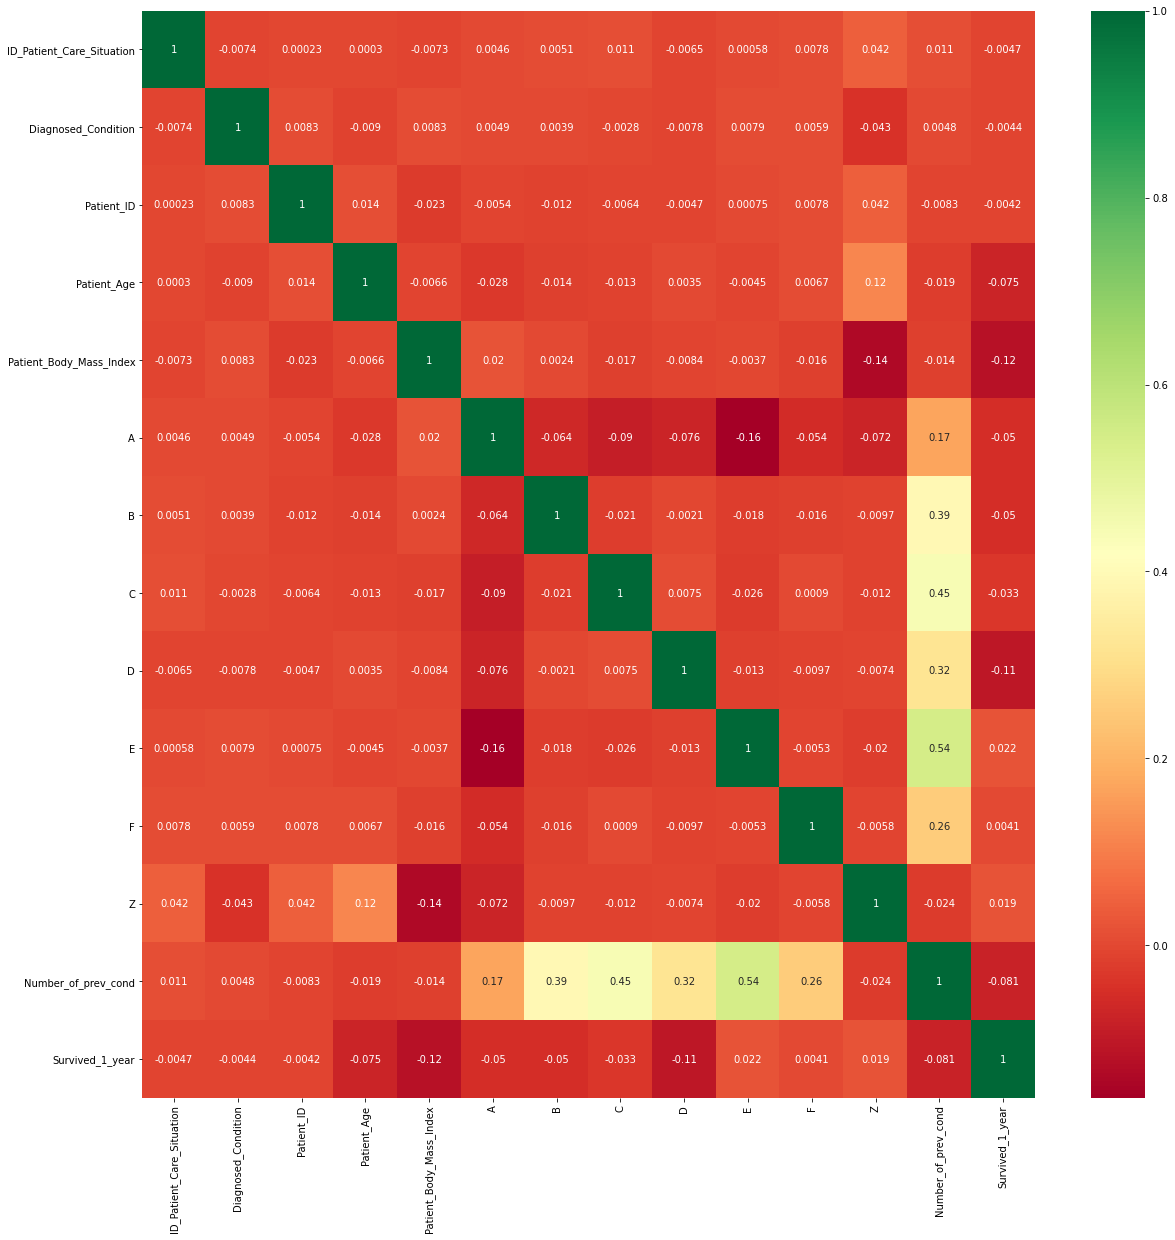

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = pharma_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(pharma_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
pharma_data['A'].fillna(1, inplace=True)
pharma_data['B'].fillna(0, inplace=True)
pharma_data['C'].fillna(0, inplace=True)
pharma_data['D'].fillna(0, inplace=True)
pharma_data['E'].fillna(0, inplace=True)
pharma_data['F'].fillna(0, inplace=True)
pharma_data['Z'].fillna(0, inplace=True)

In [ ]:
pharma_data['Number_of_prev_cond'].fillna(3, inplace=True)
pharma_data['Treated_with_drugs'].fillna('DX6', inplace=True)

In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

In [ ]:
X = pharma_data.drop('Patient_ID', axis=1)
X = X.drop('Survived_1_year', axis = 1)

In [ ]:
y = pharma_data[['Survived_1_year']]

In [ ]:
X = pd.get_dummies(X, columns=['Treated_with_drugs'])
X = pd.get_dummies(X, columns=['Patient_Smoker'])
X = pd.get_dummies(X, columns=['Patient_Rural_Urban'])
X = pd.get_dummies(X, columns=['Patient_mental_condition'])
X = X.drop('Patient_Smoker_Cannot say', axis = 1)
X.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
1,18164,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,6283,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,5339,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,33012,0,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.075, 0.10, 0.125, 0.15, 0.175, 0.20,0.225,  0.25,0.275, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='f1',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
#timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   44.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                           

In [ ]:

random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.15,
 'max_depth': 5,
 'min_child_weight': 5}

In [ ]:

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score

array([0.84011544, 0.83809524, 0.83314088, 0.82332564, 0.83516166])

In [ ]:
score.mean()

0.8339677707460618

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
y_predict = random_search.predict(X_test)

In [ ]:
print('Test Acc', accuracy_score(y_test,y_predict))
print('Test f1', f1_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

Test Acc 0.8398268398268398
Test f1 0.8752865039773494
              precision    recall  f1-score   support

           0       0.81      0.74      0.78      2157
           1       0.85      0.90      0.88      3618

    accuracy                           0.84      5775
   macro avg       0.83      0.82      0.83      5775
weighted avg       0.84      0.84      0.84      5775

[[1604  553]
 [ 372 3246]]


In [ ]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [ ]:
test_new = pd.get_dummies(test_new, columns=['Treated_with_drugs'])
test_new = pd.get_dummies(test_new, columns=['Patient_Smoker'])
test_new = pd.get_dummies(test_new, columns=['Patient_Rural_Urban'])
test_new = pd.get_dummies(test_new, columns=['Patient_mental_condition'])
test_new = test_new.drop('Patient_ID', axis=1)
test_new.head()
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_Patient_Care_Situation                9303 non-null   int64  
 1   Diagnosed_Condition                      9303 non-null   int64  
 2   Patient_Age                              9303 non-null   int64  
 3   Patient_Body_Mass_Index                  9303 non-null   float64
 4   A                                        9303 non-null   float64
 5   B                                        9303 non-null   float64
 6   C                                        9303 non-null   float64
 7   D                                        9303 non-null   float64
 8   E                                        9303 non-null   float64
 9   F                                        9303 non-null   float64
 10  Z                                        9303 no

In [ ]:
Survived_1_year = random_search.predict(test_new)

In [ ]:
res = pd.DataFrame(Survived_1_year)
res.index = test_new.index
res.columns = ["Survived_1_year"]

from google.colab import files 
res.to_csv('Assig_3_4.csv')
files.download('Assig_3_4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>